In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
data = pd.read_csv("./files_for_lab/csv_files/marketing_customer_analysis.csv")

In [5]:
# shape of the dataframe
data.shape

(10910, 26)

In [6]:
# dropping the weird column
try:
    data = data.drop(["Unnamed: 0"], axis = 1)
except:
    pass

In [7]:
# adding space between words in column name
data = data.rename(columns={'EmploymentStatus':'Employment Status'})

In [8]:
# lowercase for all column headers
cols = []
for i in data.columns:
    cols.append(i.lower())
data.columns = cols

In [9]:
# in case we wanna display the dataframe with all the columns
pd.set_option('display.max_columns', None)

In [10]:
# displaying only columns with numerical values
display(data.select_dtypes(np.number).columns)
print("Total column(s) with numerical values:",len(data.select_dtypes(np.number).columns))

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

Total column(s) with numerical values: 8


In [11]:
# displaying only columns with categorical values
display(data.select_dtypes(object).columns)
print("Total column(s) with categorical values:",len(data.select_dtypes(object).columns))

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employment status', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

Total column(s) with categorical values: 17


In [12]:
# counting nan
data.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [13]:
# displaying percentage of the nan values in the dataframe format, bcs its cool
nulls = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls = nulls.reset_index()
nulls.columns = ['header_name', 'nulls_in_%']
display(nulls)

,header_name,nulls_in_%
0,customer,0.00
1,state,5.78
2,customer lifetime value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employment status,0.00
8,gender,0.00
9,income,0.00


In [14]:
# looking for duplicates
duplicate = data[data.duplicated()]
print(len(duplicate))
# dropping duplicates, then check again to make sure
data = data.drop_duplicates()
duplicate = data[data.duplicated()]
display(duplicate)
print(len(duplicate))

37


,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type


0


In [15]:
# checking whether the nan are in the same row: response and state
# prints False if the rows dont match. prints nothing if the rows match

#saving index of the nan values to a variable
# the variables will then be matched
na_response = data[data['response'].isnull()].index.tolist()
na_state = data[data['state'].isnull()].index.tolist()
for i in range(len(na_state)):
    if na_response[i] != na_state[i]:
        print(False)

In [16]:
# just counting unique values to find the mode, if theres any
display(data["response"].value_counts(dropna=False))
display(data["state"].value_counts(dropna=False))

No     8795
Yes    1464
NaN     614
Name: response, dtype: int64

California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
NaN            614
Name: state, dtype: int64

In [17]:
# replacing nan values with mode, because adding around 5% to the mode value wont change much
data['state'] = data['state'].fillna("California")
display(data['state'].value_counts(dropna = False))
data['response'] = data['response'].fillna("No")
display(data['response'].value_counts(dropna = False))

California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: state, dtype: int64

No     9409
Yes    1464
Name: response, dtype: int64

In [18]:
# in case we want to just delete the rows. but this time i feel like keeping them. see reason above.
# data = data.drop(labels = data[data['response'].isnull()].index.tolist(), axis = 0)

In [19]:
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           623
months since policy inception       0
number of open complaints         623
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [20]:
# checking whether the nan are in the same row
# prints False if the rows dont match. prints nothing if the rows match

#saving index of the nan values to a variable
# the variables will then be matched
na_claim = data[data['months since last claim'].isnull()].index.tolist()
na_complaints = data[data['number of open complaints'].isnull()].index.tolist()
for i in range(len(na_claim)):
    if na_claim[i] != na_complaints[i]:
        print(False)

In [21]:
# quick numerical analysis
display(data[["months since last claim","number of open complaints"]].describe())
display(data[["months since last claim","number of open complaints"]].mode())

,months since last claim,number of open complaints
count,10250.000000,10250.000000
mean,15.145073,0.383512
std,10.078893,0.911190
min,0.000000,0.000000
25%,6.000000,0.000000
50%,14.000000,0.000000
75%,23.000000,0.000000
max,35.000000,5.000000


,months since last claim,number of open complaints
0,3.0,0.0


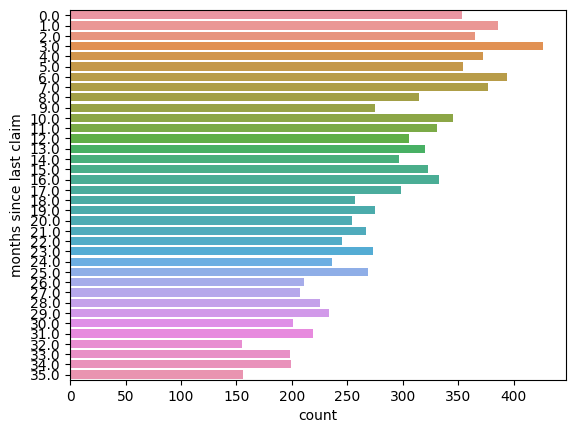

In [22]:
# checking the data distribution of the columns above
sns.countplot(y = data["months since last claim"])
plt.show()

In [23]:
# getting mean
mean_claim = data["months since last claim"].mean(skipna=True)
# getting median
median_complaints = data["months since last claim"].median(skipna=True)

In [24]:
# replacing nan values with mean, because the data looks evenly distributed
data['months since last claim'] = data['months since last claim'].fillna(mean_claim)
data['number of open complaints'] = data['number of open complaints'].fillna(median_complaints)

In [25]:
# check again
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [26]:
# checking whether the nan are in the same row
# prints False if the rows dont match. prints nothing if the rows match

#saving index of the nan values to a variable
# the variables will then be matched
na_vclass = data[data['vehicle class'].isnull()].index.tolist()
na_vsize = data[data['vehicle size'].isnull()].index.tolist()
for i in range(len(na_vclass)):
    if na_vclass[i] != na_vsize[i]:
        print(False)

In [27]:
# identifying the values (and the nan)
display(data["vehicle class"].value_counts(dropna=False))
display(data["vehicle size"].value_counts(dropna=False))

Four-Door Car    5200
Two-Door Car     2112
SUV              2009
NaN               608
Sports Car        548
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

Medsize    7233
Small      1962
Large      1070
NaN         608
Name: vehicle size, dtype: int64

In [28]:
# replacing the nan values with mode, because mode(s) in both columns are significantly dominant
data['vehicle class'] = data['vehicle class'].fillna("Four-Door Car")
data['vehicle size'] = data['vehicle size'].fillna("Medsize")

In [29]:
# check again
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                       0
vehicle size                        0
vehicle type                     5465
dtype: int64

In [30]:
# checking the last column
data[["vehicle type"]].value_counts(dropna=False)

vehicle type
NaN             5465
A               5408
dtype: int64

In [31]:
# since there's only 2 possibilities: either put all A in nan, or put "unknown". 
# either way the value in that column is not significant in analyzing the data. not enough valuable info
# therefore: drop that column
try:
    data = data.drop(['vehicle type'], axis=1)
except:
    pass

In [32]:
# final check
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [33]:
# extracting months value from datetime column
data['month'] = pd.DatetimeIndex(data['effective to date']).month
data["month"].value_counts(dropna=False)
data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.000000,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.000000,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,15.145073,31,14.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,15.145073,40,14.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.000000,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.000000,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.000000,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


# Round 3

In [34]:
# show dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10873 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10873 non-null  object 
 1   state                          10873 non-null  object 
 2   customer lifetime value        10873 non-null  float64
 3   response                       10873 non-null  object 
 4   coverage                       10873 non-null  object 
 5   education                      10873 non-null  object 
 6   effective to date              10873 non-null  object 
 7   employment status              10873 non-null  object 
 8   gender                         10873 non-null  object 
 9   income                         10873 non-null  int64  
 10  location code                  10873 non-null  object 
 11  marital status                 10873 non-null  object 
 12  monthly premium auto           10873 non-null 

In [35]:
# describe dataframe
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000
mean,8016.881720,37537.101444,93.216684,15.145073,48.098777,1.163708,2.977467,434.902879,1.466661
std,6884.829202,30362.078350,34.454801,9.785857,27.929932,3.286097,2.397752,292.233402,0.498910
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.014511,1.000000
50%,5768.830622,33811.000000,83.000000,15.000000,48.000000,0.000000,2.000000,383.363758,1.000000
75%,8996.774075,62262.000000,109.000000,23.000000,71.000000,1.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,14.000000,9.000000,2893.239678,2.000000


In [36]:
# displaying the data
data.head(1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.21696,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.8,Four-Door Car,Medsize,2


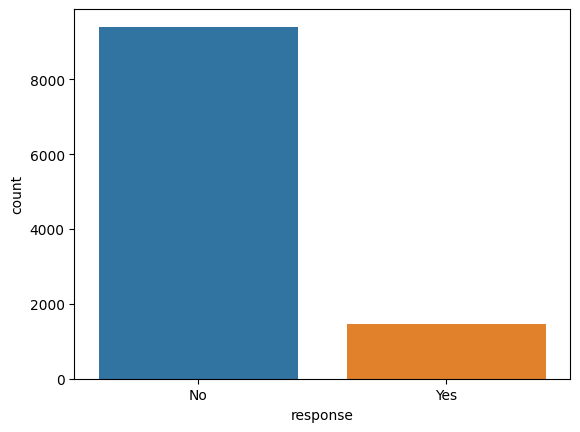

In [37]:
# total number of response: countplot
sns.countplot(x = "response", data = data)
plt.show()

In [38]:
# adding numerical response to the dataframe
data ["response_num"] = data["response"].map(dict(Yes = 1, No = 0))
# checking the new column
data["response_num"].value_counts(dropna=False)

0    9409
1    1464
Name: response_num, dtype: int64

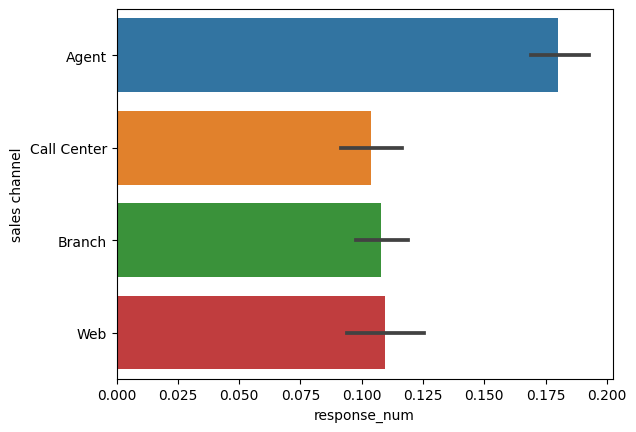

In [39]:
# showing a plot of response rate (num) by the sales channel
sns.barplot(x = "response_num", y = "sales channel", data = data)
plt.show()

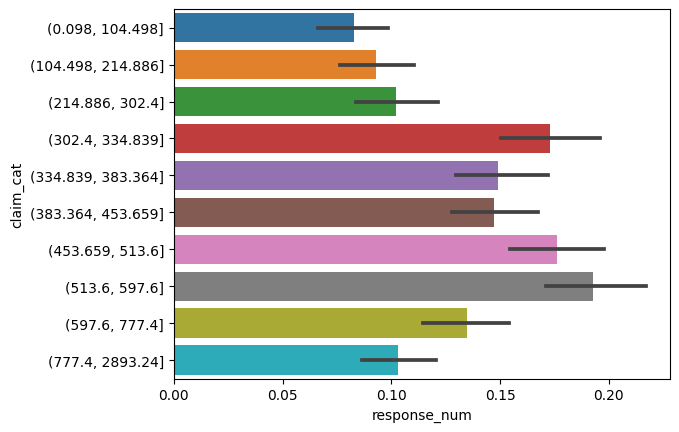

In [40]:
# showing a plot of response rate by the total claim amount
# making the bins first (splitting claim values between intervals)
data['claim_cat'] = pd.qcut(data['total claim amount'], q=10)
sns.barplot(x = data["response_num"], y = data['claim_cat'])
plt.show()

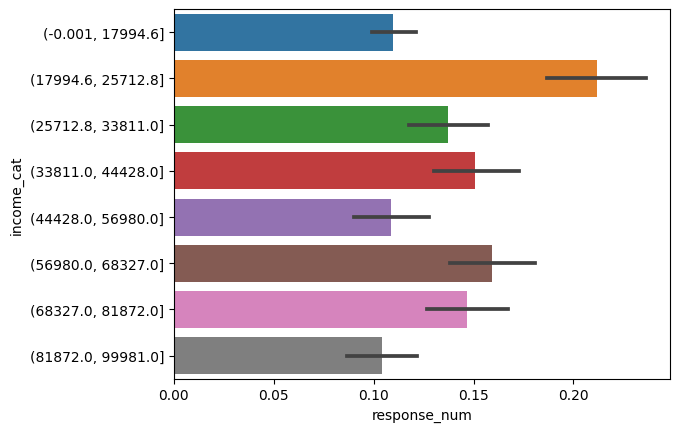

In [41]:
# same sweet, different story
data['income_cat'] = pd.qcut(data['income'], q=10, duplicates='drop')
sns.barplot(x = data["response_num"], y = data['income_cat'])
plt.show()

# round 4

In [42]:
data.head(1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month,response_num,claim_cat,income_cat
0,DK49336,Arizona,4809.21696,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.8,Four-Door Car,Medsize,2,0,"(214.886, 302.4]","(44428.0, 56980.0]"


In [43]:
display(data.select_dtypes(np.number).columns)

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'month', 'response_num'],
      dtype='object')

In [44]:
numerical = pd.DataFrame(data.select_dtypes(np.number))
numerical.head(1)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num
0,4809.21696,48029,61,7.0,52,0.0,9,292.8,2,0


In [45]:
display(data.select_dtypes(object).columns)

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employment status', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [48]:
categorical = pd.DataFrame(data.select_dtypes(object))
categorical.head(1)

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize


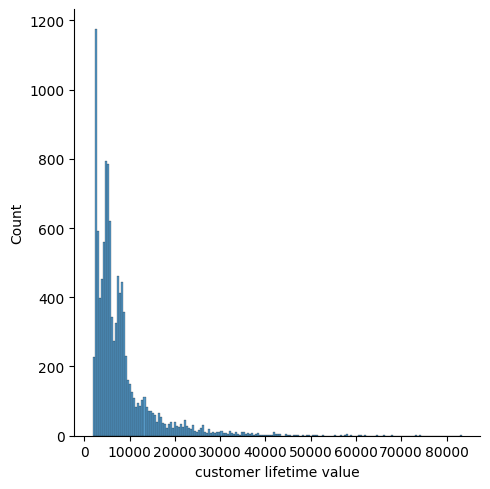

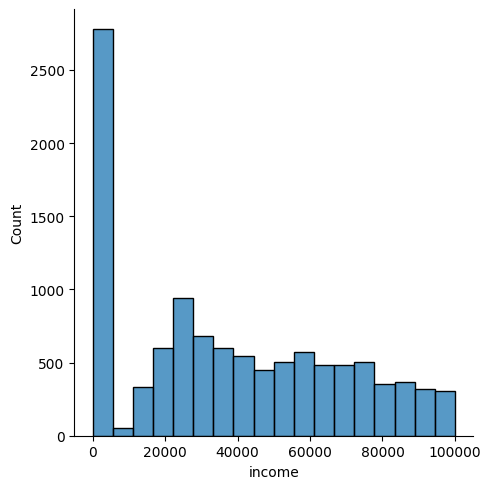

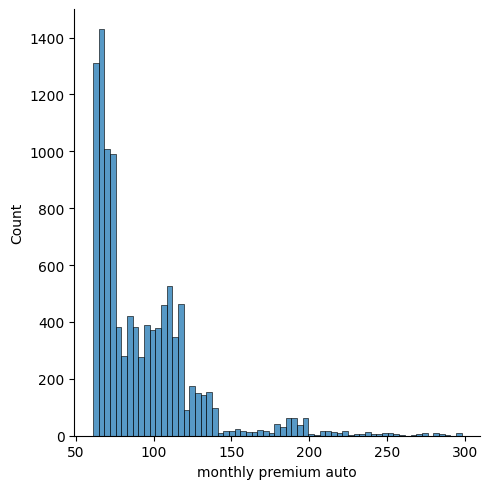

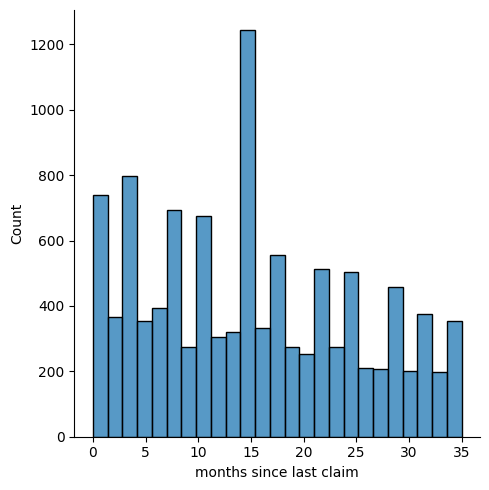

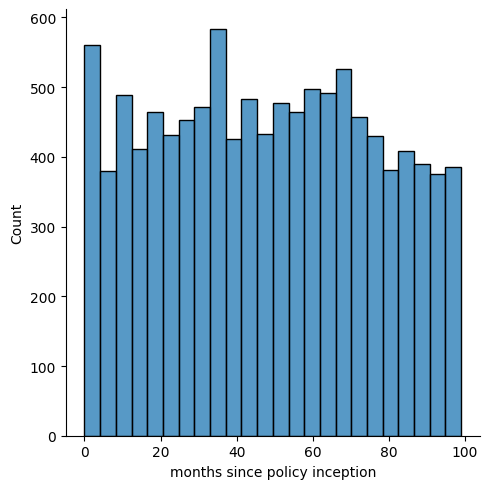

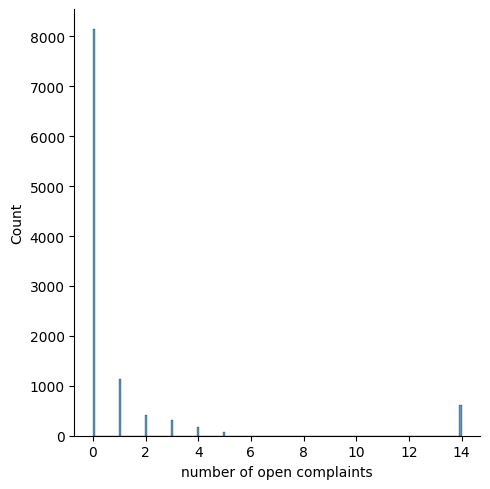

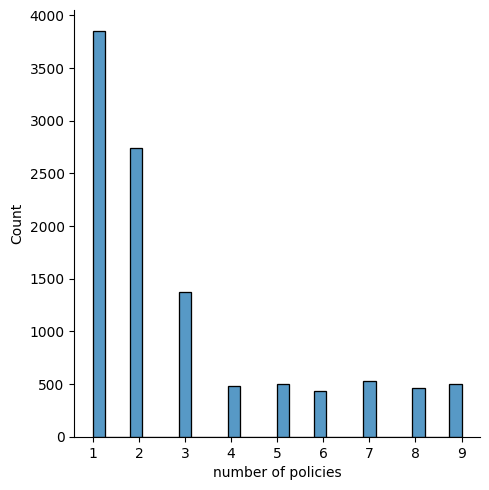

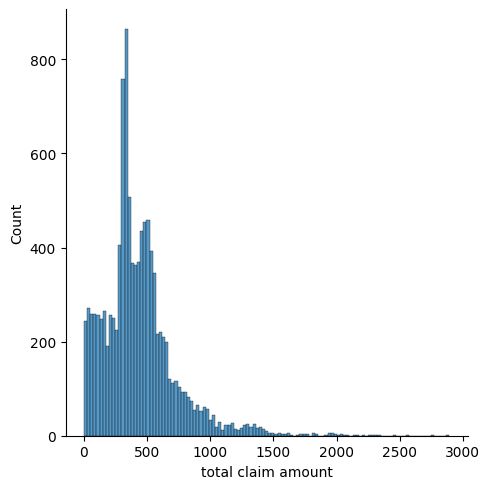

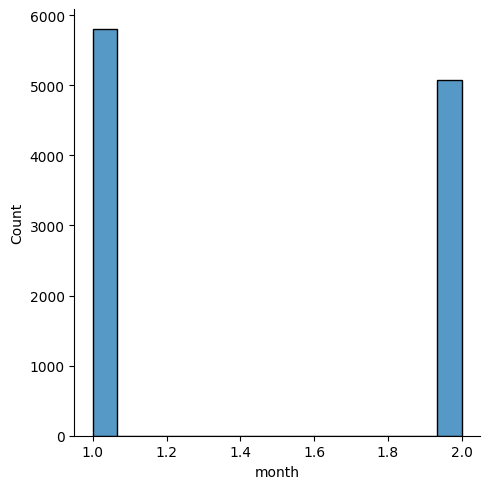

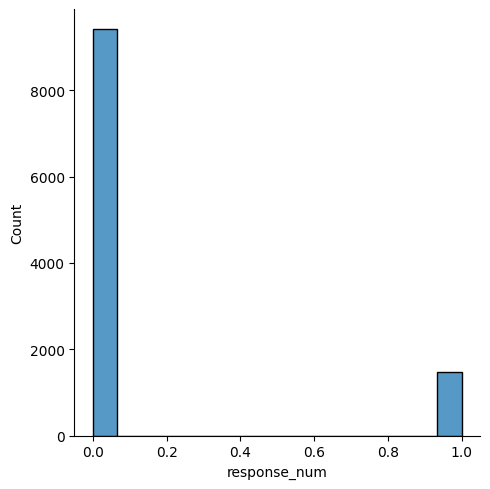

In [51]:
# distribution plots for all columns in numerical dataframe
for i in numerical.columns:
    sns.displot(x = i, data = numerical)
    plt.show()

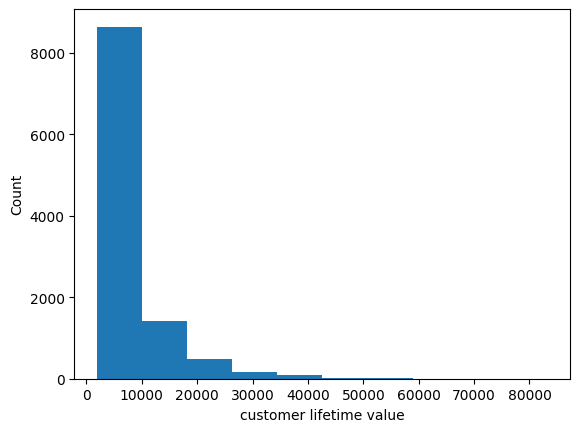

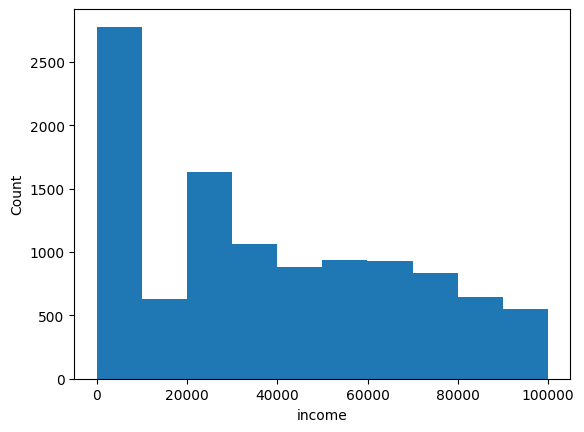

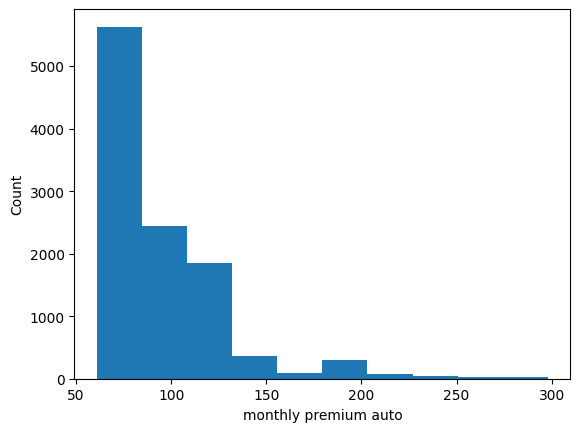

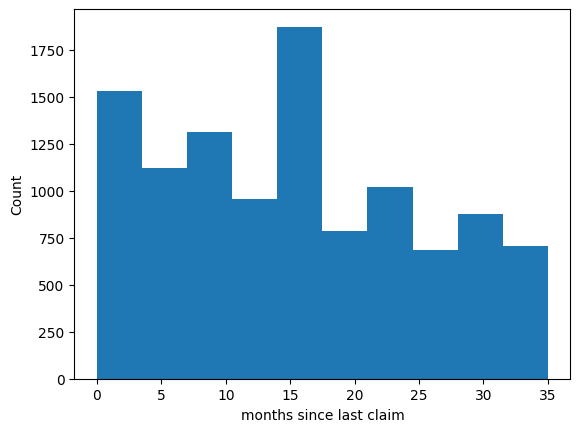

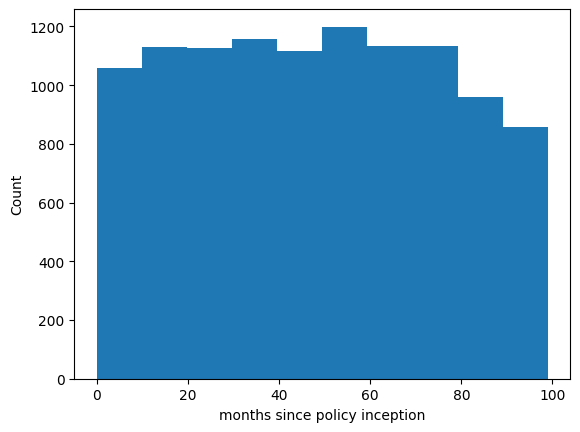

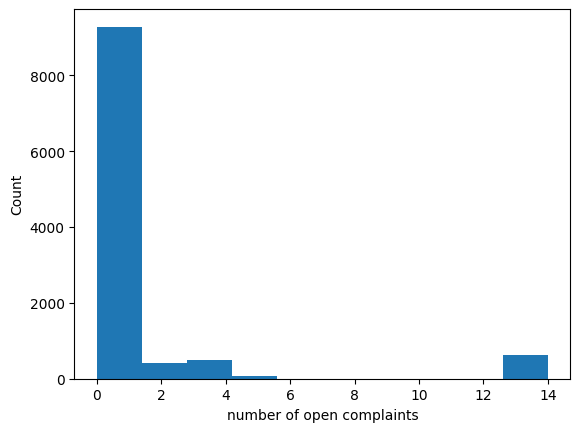

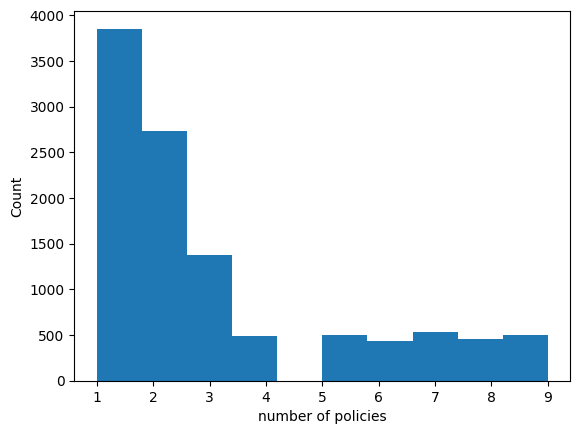

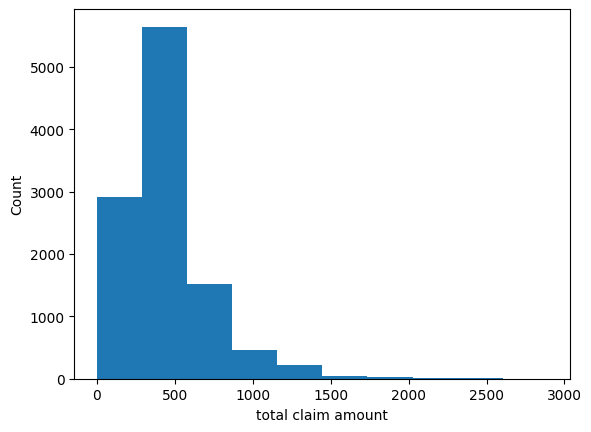

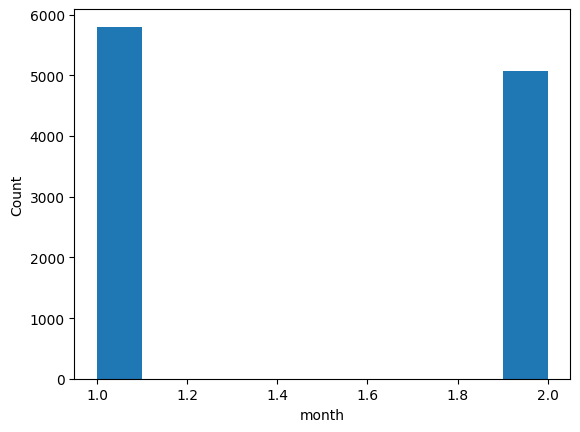

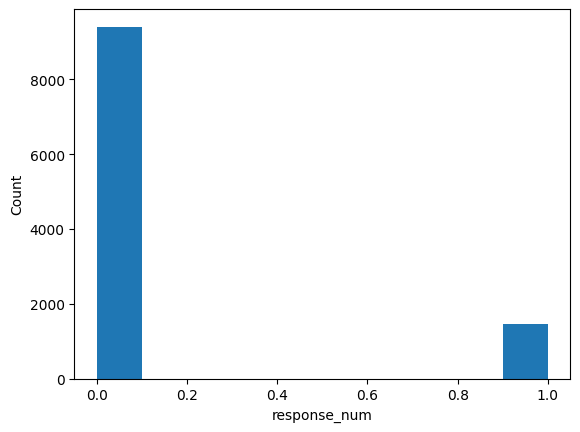

In [57]:
for i in numerical.columns:
    plt.hist(x = data[i], density = False)  # density=False would make counts
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.show()

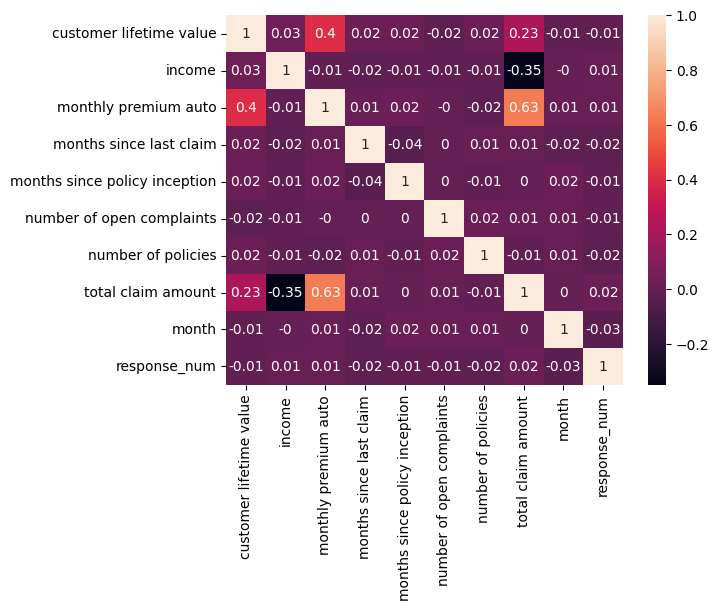

In [69]:
correlations_matrix = data.corr()
correlations_matrix = correlations_matrix.round(2)
correlations_matrix.head(5)
sns.heatmap(correlations_matrix, annot=True)
plt.show()


In [70]:
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num
customer lifetime value,1.00,0.03,0.40,0.02,0.02,-0.02,0.02,0.23,-0.01,-0.01
income,0.03,1.00,-0.01,-0.02,-0.01,-0.01,-0.01,-0.35,-0.00,0.01
monthly premium auto,0.40,-0.01,1.00,0.01,0.02,-0.00,-0.02,0.63,0.01,0.01
months since last claim,0.02,-0.02,0.01,1.00,-0.04,0.00,0.01,0.01,-0.02,-0.02
months since policy inception,0.02,-0.01,0.02,-0.04,1.00,0.00,-0.01,0.00,0.02,-0.01
number of open complaints,-0.02,-0.01,-0.00,0.00,0.00,1.00,0.02,0.01,0.01,-0.01
number of policies,0.02,-0.01,-0.02,0.01,-0.01,0.02,1.00,-0.01,0.01,-0.02
total claim amount,0.23,-0.35,0.63,0.01,0.00,0.01,-0.01,1.00,0.00,0.02
month,-0.01,-0.00,0.01,-0.02,0.02,0.01,0.01,0.00,1.00,-0.03
response_num,-0.01,0.01,0.01,-0.02,-0.01,-0.01,-0.02,0.02,-0.03,1.00


In [ ]:
# end of round 4?

# round 5

In [71]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
#we split be target_d and drop it.



In [72]:
y = data['total claim amount']
X = data.drop(['total claim amount'], axis=1)

In [77]:
display(numerical.head(1))
display(categorical.head(1))

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num
0,4809.21696,48029,61,7.0,52,0.0,9,292.8,2,0


,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize


In [78]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
# making tool called transformer by fitting the X_num into the funct MinMaxScaler()
transformer = MinMaxScaler().fit(numerical)
# producing the "normalized" value, but dont produce the dataframe/series/list
x_normalized = transformer.transform(numerical)
print(x_normalized.shape)
x_normalized
# it needs to be made a dataframe first to see it in a nicer manner
pd.DataFrame(x_normalized, columns=numerical.columns)

(10873, 10)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,0.101171,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.257445,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,0.165875,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.167263,0.0,1.0
4,0.087527,0.236795,0.236287,0.432716,0.313131,1.000000,0.750,0.244657,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10868,0.167823,0.000000,0.810127,0.432716,0.404040,1.000000,0.750,0.419717,0.0,0.0
10869,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.094333,0.0,0.0
10870,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,0.131763,1.0,0.0
10871,0.123717,0.642072,0.409283,0.000000,0.272727,0.285714,0.625,0.213674,1.0,0.0


In [79]:
pd.DataFrame(x_normalized, columns=numerical.columns).corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num
customer lifetime value,1.000000,0.027354,0.402617,0.015805,0.016709,-0.017078,0.016428,0.232583,-0.009607,-0.007828
income,0.027354,1.000000,-0.009929,-0.023094,-0.005992,-0.012843,-0.010831,-0.354613,-0.000239,0.011659
monthly premium auto,0.402617,-0.009929,1.000000,0.008350,0.019339,-0.002814,-0.020300,0.631372,0.007366,0.013457
months since last claim,0.015805,-0.023094,0.008350,1.000000,-0.037666,0.000405,0.008023,0.012316,-0.019588,-0.015126
months since policy inception,0.016709,-0.005992,0.019339,-0.037666,1.000000,0.000501,-0.010445,0.003780,0.016032,-0.005090
number of open complaints,-0.017078,-0.012843,-0.002814,0.000405,0.000501,1.000000,0.022275,0.009935,0.010174,-0.010140
number of policies,0.016428,-0.010831,-0.020300,0.008023,-0.010445,0.022275,1.000000,-0.008702,0.005792,-0.018431
total claim amount,0.232583,-0.354613,0.631372,0.012316,0.003780,0.009935,-0.008702,1.000000,0.001624,0.016232
month,-0.009607,-0.000239,0.007366,-0.019588,0.016032,0.010174,0.005792,0.001624,1.000000,-0.033588
response_num,-0.007828,0.011659,0.013457,-0.015126,-0.005090,-0.010140,-0.018431,0.016232,-0.033588,1.000000
